# PCA (Principal Component Analysis)

* Boyut buyuk olunca zaman ve maliyet artıyor, 3D sonrasi görselleştirmek zor. 
* High correlations a sahip feature lar overfittinge sebep oluyor ve gereksiz yuk oluyor. En değerli feature bulmaya calisiriz. PCA(temel bileşenler analizi), yüksek boyutlu verilerde boyut azaltma metoudur.
* PCA ile maksimum varyansi minimum degisken sayisiyla oluşturuyoruz. Herhangi bir referansa bagli olmaksisin, öznitelikleri kullandigindan unsupervised bir algoritmadır.
* feature selection: 100 featuredan en önemli 10 taneyi seçmek
* feature extraction; en yüksek varyansi en dusuk sayida feature ile veren optimum noktada feature seçiyor.
* PCA (Principal component Analysis) boyut azaltma algoritmasıdır. Amac, model algoritmasini  hızlı hale getirip daha iyi sonuç almak, hem görselleştirme olarak hemde daha az overfiting tehlikesi olarak.
* Undersampling rowwise, pca ise feauture wise diyebiliriz
* Yeni features birbiri ile correle değil
* Model performansi artar
* PCA sonrasi kalan feature verisi direk bakip orijinal veri kadar yorumlanamaz.

> Dataset bir modele sokulur, modelde problem varsa, cozum dusunulur:
* Veri setini artirmak, 
* Modeli değiştirmek,
* GridSearch ile daha basarili parametreler bulmak 
* Tekrar EDA yapmak
* PCA yapmak.


In [234]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)

In [235]:
df = pd.read_csv("Wine.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [236]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [237]:
df.shape

(178, 14)

In [238]:
# df.dropna(inplace = True)

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [240]:
df.apply(lambda x: x.nunique())

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
Customer_Segment          3
dtype: int64

In [241]:
def perc_col(df,col):
    for i in sorted(df[col].unique(),reverse=True):
        print('%s: %%%.2f' % (i, 100*df[col].value_counts()[i]/len(df)))
        
perc_col(df,'Customer_Segment')

3: %26.97
2: %39.89
1: %33.15


In [242]:
print('Unique Values of Each Features:\n')
for i in df:
    print(f'{i}:\n{sorted(df[i].unique())}\n')

Unique Values of Each Features:

Alcohol:
[11.03, 11.41, 11.45, 11.46, 11.56, 11.61, 11.62, 11.64, 11.65, 11.66, 11.76, 11.79, 11.81, 11.82, 11.84, 11.87, 11.96, 12.0, 12.04, 12.07, 12.08, 12.16, 12.17, 12.2, 12.21, 12.22, 12.25, 12.29, 12.33, 12.34, 12.36, 12.37, 12.42, 12.43, 12.45, 12.47, 12.51, 12.52, 12.53, 12.58, 12.6, 12.64, 12.67, 12.69, 12.7, 12.72, 12.77, 12.79, 12.81, 12.82, 12.84, 12.85, 12.86, 12.87, 12.88, 12.93, 12.96, 12.99, 13.03, 13.05, 13.07, 13.08, 13.11, 13.16, 13.17, 13.2, 13.23, 13.24, 13.27, 13.28, 13.29, 13.3, 13.32, 13.34, 13.36, 13.39, 13.4, 13.41, 13.45, 13.48, 13.49, 13.5, 13.51, 13.52, 13.56, 13.58, 13.62, 13.63, 13.64, 13.67, 13.68, 13.69, 13.71, 13.72, 13.73, 13.74, 13.75, 13.76, 13.77, 13.78, 13.82, 13.83, 13.84, 13.86, 13.87, 13.88, 13.9, 13.94, 14.02, 14.06, 14.1, 14.12, 14.13, 14.16, 14.19, 14.2, 14.21, 14.22, 14.23, 14.3, 14.34, 14.37, 14.38, 14.39, 14.75, 14.83]

Malic_Acid:
[0.74, 0.89, 0.9, 0.92, 0.94, 0.98, 0.99, 1.01, 1.07, 1.09, 1.1, 1.13, 1.1

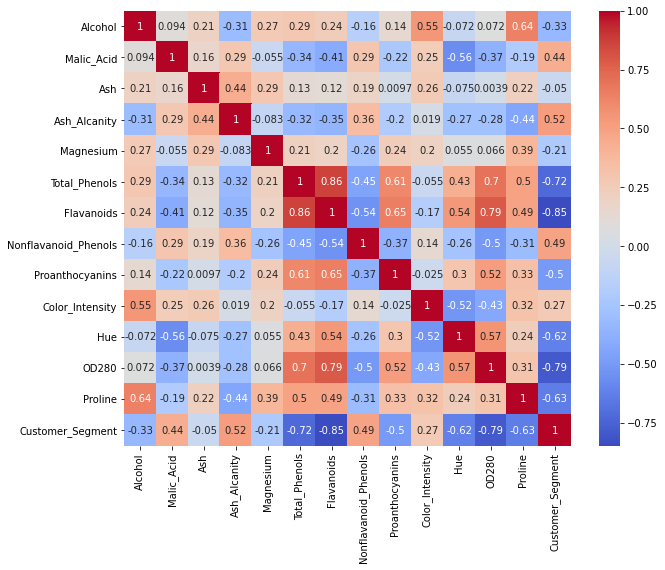

In [243]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True);

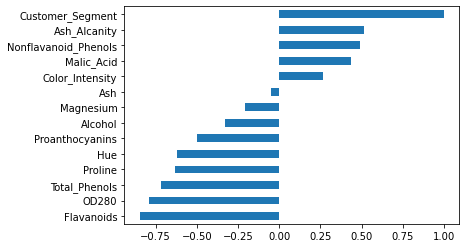

In [244]:
df.corr()["Customer_Segment"].sort_values().plot.barh();

In [245]:
X=df.drop('Customer_Segment',axis=1)
y=df.Customer_Segment

In [246]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 0)

**Log reg without scaling**

In [247]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\fatih\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [248]:
y_pred=classifier.predict(X_test)

In [249]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



In [250]:
confusion_matrix(y_test, y_pred)

array([[12,  0,  0],
       [ 1, 13,  0],
       [ 0,  0, 10]], dtype=int64)

**Log Reg After Scaling**

In [251]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [252]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

In [253]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [254]:
confusion_matrix(y_test, y_pred)

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 10]], dtype=int64)

In [255]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.450836,-1.279856,0.743060,-0.491365,-0.370780,-0.155583,0.179657,-1.208221,1.291510,-0.844864,-0.749108,0.666749,-0.712474
1,1.347464,-0.757565,-0.211823,-0.842576,-0.296833,-0.155583,0.398383,-0.876208,-0.049017,-0.006570,0.996524,0.295069,1.632453
2,0.684709,0.216198,1.147049,1.411026,0.442645,-1.213825,-1.182406,0.202831,-0.100576,1.566845,-0.978796,-1.163061,-0.002825
3,0.574249,1.110289,-0.689264,-0.052352,-0.814467,-1.099861,-1.540320,1.779890,-1.234868,0.294357,-0.657232,-1.134470,-0.527348
4,-1.058092,-0.642484,-0.248549,0.913477,-0.666572,-0.839370,-0.337330,0.534844,-0.066203,-1.102801,1.731527,-0.505473,-0.789609
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1.322917,-0.279536,0.081988,-0.257225,0.294750,0.739852,0.885544,-0.378190,1.343069,0.509304,0.537147,0.195001,0.953659
138,-1.168551,-0.155603,-0.762717,0.386661,-1.036310,0.495642,0.617108,0.036825,-0.427114,-0.969533,-0.427544,0.952657,-1.150605
139,-0.603982,2.809947,0.963418,1.557364,-0.222885,-0.823090,-1.421015,2.194905,-0.856771,-0.006570,-0.611295,-1.320310,-0.727901
140,1.617475,-0.580517,1.183775,1.557364,-0.074989,0.821255,-0.715129,1.364874,1.893028,3.432587,-1.759736,-0.934334,-0.280513


**Implementation of PCA**

> PCA in ilk adimi her zaman Scalingdir

**Optimal Component Number with PCA**

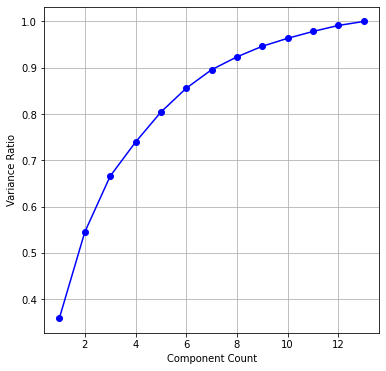

In [256]:
plt.figure(figsize=(6,6))
pca = PCA().fit(X_train)
x = range(1,14)
plt.plot(x,np.cumsum(pca.explained_variance_ratio_), "bo-")
plt.xlabel("Component Count")
plt.ylabel("Variance Ratio")
plt.grid()
plt.show()

In [257]:
from sklearn.decomposition import PCA

In [258]:
pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [259]:
pd.DataFrame(X_train)

,0,1
0,-0.783937,-1.590432
1,-1.792083,0.583400
2,2.101051,2.109598
3,3.107242,0.448619
4,0.725718,-2.107998
...,...,...
137,-2.045510,1.227113
138,0.121802,-2.205476
139,3.858038,0.730102
140,0.995597,3.578715


In [260]:
component_X_train = pd.DataFrame(data = X_train, columns=["first_component","second_component"])
component_X_train

,first_component,second_component
0,-0.783937,-1.590432
1,-1.792083,0.583400
2,2.101051,2.109598
3,3.107242,0.448619
4,0.725718,-2.107998
...,...,...
137,-2.045510,1.227113
138,0.121802,-2.205476
139,3.858038,0.730102
140,0.995597,3.578715


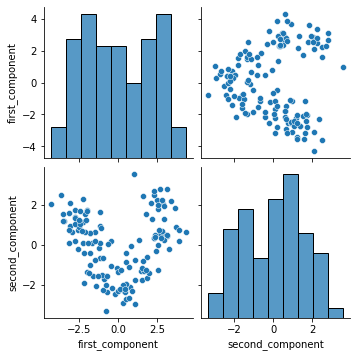

In [261]:
sns.pairplot(component_X_train);

In [262]:
component_X_train.corr()

,first_component,second_component
first_component,1.000000e+00,2.040282e-16
second_component,2.040282e-16,1.000000e+00


> component lar arasinda korelasyon yok

In [263]:
pca.explained_variance_ratio_

array([0.35950519, 0.18547258])

**Log Reg after PCA**

In [264]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

In [265]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.92      0.92      0.92        12
           2       0.93      0.93      0.93        14
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



In [266]:
confusion_matrix(y_test, y_pred)

array([[11,  1,  0],
       [ 1, 13,  0],
       [ 0,  0, 10]], dtype=int64)

In [267]:
pca.explained_variance_ratio_

array([0.35950519, 0.18547258])

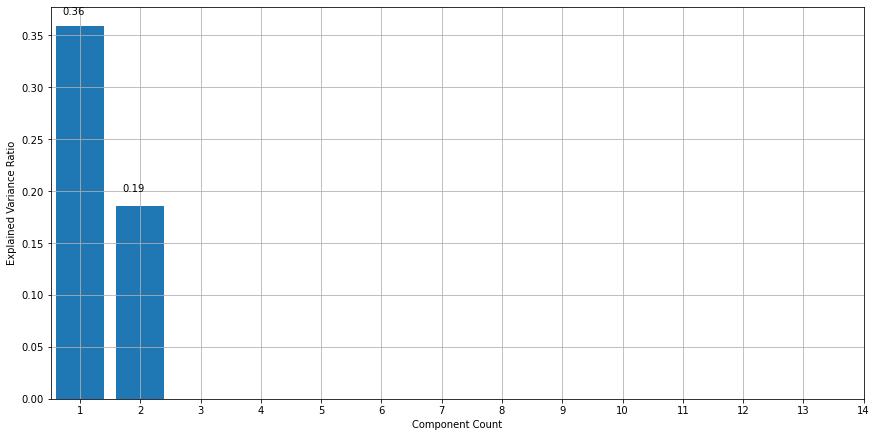

In [268]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(range(1,X_train.shape[1]+1), pca.explained_variance_ratio_)

for index,data in enumerate(pca.explained_variance_ratio_):
    ax.text(x=index+0.7 , y =round(data,2)+0.01 , s=f"{round(data,2)}")
plt.tight_layout()
plt.xlabel("Component Count")
plt.ylabel("Explained Variance Ratio")
plt.xticks(range(1,df.shape[1]+1))
plt.grid()
plt.show()

In [269]:
pca = PCA(n_components = 4)
pca_fit = pca.fit_transform(df)

In [270]:
pca.explained_variance_ratio_

array([9.98087625e-01, 1.73591851e-03, 9.58948998e-05, 5.13200714e-05])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


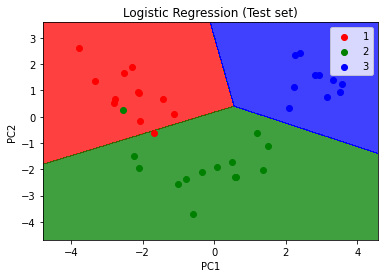

In [271]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()